# School Budgets: Use Data to Have a Social Impact

Data science isn't just for predicting ad-clicks-it's also useful for social impact! This course is a case study from a machine learning competition on DrivenData. You'll explore a problem related to school district budgeting. By **building a model to automatically classify items in a school's budget**, it makes it easier and faster for schools to compare their spending with other schools. In this course, you'll begin by building a baseline model that is a simple, first-pass approach. In particular, you'll do some **natural language processing** to prepare the budgets for modeling. Next, you'll have the opportunity to try your own techniques and see how they compare to participants from the competition. Finally, you'll see how the winner was able to combine a number of expert techniques to build the most accurate model.

You're going to be working with school district budget data. This data can be classified in many ways according to certain labels, e.g. Function: Career & Academic Counseling, or Position_Type: Librarian.

Your goal is to develop a model that predicts the probability for each possible label by relying on some correctly labeled examples. We have ourselves a **multi-class-multi-label classification problem**, because there are 9 broad categories that each take on many possible sub-label instances.

## Loading the data

Now it's time to check out the dataset! You'll use pandas (which has been pre-imported as pd) to load your data into a DataFrame and then do some **Exploratory Data Analysis (EDA)** of it.

The training data is available as `TrainingData.csv`. Your first task is to load it into a DataFrame using `pd.read_csv()` along with the keyword argument `index_col=0`.

Use methods such as `.info()`, `.head()`, and `.tail()` to explore the budget data and the properties of the features and labels.

Some of the column names correspond to features - descriptions of the budget items - such as the `Job_Title_Description column`. The values in this column tell us if a budget item is for a teacher, custodian, or other employee.

Some columns correspond to the budget item labels you will be trying to predict with your model. For example, the `Object_Type` column describes whether the budget item is related classroom supplies, salary, travel expenses, etc.

Use `df.info()` to answer the following questions:

- How many rows are there in the training data?
- How many columns are there in the training data?
- How many non-null entries are in the `Job_Title_Description` column?

In [1]:
import pandas as pd

path = 'data/dc19/'

In [2]:
df = pd.read_csv(path+'TrainingData.csv', index_col=0)
df.head()

,Function,Use,Sharing,Reporting,Student_Type,Position_Type,Object_Type,Pre_K,Operating_Status,Object_Description,...,Sub_Object_Description,Location_Description,FTE,Function_Description,Facility_or_Department,Position_Extra,Total,Program_Description,Fund_Description,Text_1
198,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,Non-Operating,Supplemental *,...,Non-Certificated Salaries And Wages,NaN,NaN,Care and Upkeep of Building Services,NaN,NaN,-8291.86,NaN,Title I - Disadvantaged Children/Targeted Assi...,TITLE I CARRYOVER
209,Student Transportation,NO_LABEL,Shared Services,Non-School,NO_LABEL,NO_LABEL,Other Non-Compensation,NO_LABEL,PreK-12 Operating,REPAIR AND MAINTENANCE SERVICES,...,NaN,ADMIN. SERVICES,NaN,STUDENT TRANSPORT SERVICE,NaN,NaN,618.29,PUPIL TRANSPORTATION,General Fund,NaN
750,Teacher Compensation,Instruction,School Reported,School,Unspecified,Teacher,Base Salary/Compensation,Non PreK,PreK-12 Operating,Personal Services - Teachers,...,NaN,NaN,1.0,NaN,NaN,TEACHER,49768.82,Instruction - Regular,General Purpose School,NaN
931,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,Non-Operating,General Supplies,...,General Supplies,NaN,NaN,Instruction,Instruction And Curriculum,NaN,-1.02,"""Title I, Part A Schoolwide Activities Related...",General Operating Fund,NaN
1524,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,Non-Operating,Supplies and Materials,...,Supplies And Materials,NaN,NaN,Other Community Services *,NaN,NaN,2304.43,NaN,Title I - Disadvantaged Children/Targeted Assi...,TITLE I PI+HOMELESS


In [3]:
df.tail()

,Function,Use,Sharing,Reporting,Student_Type,Position_Type,Object_Type,Pre_K,Operating_Status,Object_Description,...,Sub_Object_Description,Location_Description,FTE,Function_Description,Facility_or_Department,Position_Extra,Total,Program_Description,Fund_Description,Text_1
344986,Substitute Compensation,Instruction,School Reported,School,Unspecified,Substitute,Benefits,NO_LABEL,PreK-12 Operating,EMPLOYEE BENEFITS,...,NaN,NaN,NaN,UNALLOC BUDGETS/SCHOOLS,NaN,PROFESSIONAL-INSTRUCTIONAL,27.04000,GENERAL HIGH SCHOOL EDUCATION,NaN,REGULAR INSTRUCTION
384803,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,Non-Operating,EMPLOYEE BENEFITS,...,NaN,PERSONNEL-PAID LEAVE,NaN,NON-PROJECT,NaN,PROFESSIONAL-INSTRUCTIONAL,NaN,STAFF SERVICES,NaN,CENTRAL
224382,Substitute Compensation,Instruction,School Reported,School,Special Education,Substitute,Substitute Compensation,NO_LABEL,PreK-12 Operating,OTHER PERSONAL SERVICES,...,NaN,School,0.0,EXCEPTIONAL,NaN,NaN,200.39000,NaN,GENERAL FUND,NaN
305347,Facilities & Maintenance,O&M,Leadership & Management,Non-School,Gifted,Custodian,Other Compensation/Stipend,Non PreK,PreK-12 Operating,Extra Duty Pay/Overtime For Support Personnel,...,Extra Duty Pay/Overtime For Support Personnel,Unallocated,NaN,Facilities Maintenance And Operations,Gifted And Talented,ANY CUS WHO IS NOT A SUPER,5.29000,Gifted And Talented,General Operating Fund,ADDL REGULAR PAY-NOT SMOOTHED
101861,Teacher Compensation,Instruction,School Reported,School,Poverty,Teacher,Base Salary/Compensation,NO_LABEL,PreK-12 Operating,SALARIES OF REGULAR EMPLOYEES,...,NaN,NaN,NaN,TITLE I,NaN,PROFESSIONAL-INSTRUCTIONAL,1575.03504,GENERAL ELEMENTARY EDUCATION,NaN,REGULAR INSTRUCTION


In [4]:
df.shape

(1560, 25)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1560 entries, 198 to 101861
Data columns (total 25 columns):
Function                  1560 non-null object
Use                       1560 non-null object
Sharing                   1560 non-null object
Reporting                 1560 non-null object
Student_Type              1560 non-null object
Position_Type             1560 non-null object
Object_Type               1560 non-null object
Pre_K                     1560 non-null object
Operating_Status          1560 non-null object
Object_Description        1461 non-null object
Text_2                    382 non-null object
SubFund_Description       1183 non-null object
Job_Title_Description     1131 non-null object
Text_3                    296 non-null object
Text_4                    193 non-null object
Sub_Object_Description    364 non-null object
Location_Description      874 non-null object
FTE                       449 non-null float64
Function_Description      1340 non-null object
F

## Summarizing the data

You'll continue your EDA in this exercise by computing **summary statistics** for the numeric data in the dataset. The data has been pre-loaded into a DataFrame called df.

You can use `df.info()` to determine which columns of the data are numeric, specifically type float64. You'll notice that there are two numeric columns, called `FTE` and `Total`.

`FTE`: Stands for `"full-time equivalent"`. If the budget item is associated to an employee, this number tells us the percentage of full-time that the employee works. A value of 1 means the associated employee works for the school full-time. A value close to 0 means the item is associated to a part-time or contracted employee.
`Total`: Stands for the `total cost of the expenditure`. This number tells us how much the budget item cost.

After printing **summary statistics** for the numeric data, your job is to plot a histogram of the non-null FTE column to see the distribution of part-time and full-time employees in the dataset.

              FTE         Total
count  449.000000  1.542000e+03
mean     0.493532  1.446867e+04
std      0.452844  7.916752e+04
min     -0.002369 -1.044084e+06
25%      0.004310  1.108111e+02
50%      0.440000  7.060299e+02
75%      1.000000  5.347760e+03
max      1.047222  1.367500e+06


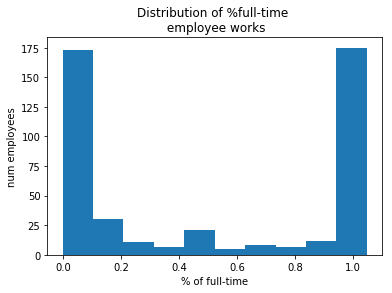

In [7]:
# Print the summary statistics
print(df.describe())

# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline

# Create the histogram
plt.hist(df['FTE'].dropna())

# Add title and labels
plt.title('Distribution of %full-time \n employee works')
plt.xlabel('% of full-time')
plt.ylabel('num employees')

# Display the histogram
plt.show();

The high variance in expenditures makes sense (some purchases are cheap some are expensive). Also, it looks like the FTE column is bimodal. That is, there are some part-time and some full-time employees.

## Exploring datatypes in pandas

It's always good to know what datatypes you're working with, especially when the inefficient pandas type object may be involved. Towards that end, let's explore what we have.

The data has been loaded into the workspace as `df`. Your job is to look at the DataFrame attribute `.dtypes`, and call its `.value_counts()` method in order to answer the question below.

Make sure to call `df.dtypes.value_counts()`, and not df.value_counts()! Check out the difference in the Shell. df.value_counts() will return an error, because it is a Series method, not a DataFrame method.

How many columns with dtype object are in the data?

In [8]:
df.dtypes.value_counts()

object     23
float64     2
dtype: int64

## Encode the labels as categorical variables

Remember, **your ultimate goal is to predict the probability that a certain label is attached to a budget line item**. You just saw that many columns in your data are the inefficient object type. Does this include the labels you're trying to predict? Let's find out!

There are 9 columns of labels in the dataset. Each of these columns is a category that has many possible values it can take. The 9 labels have been loaded into a list called LABELS. In the Shell, check out the type for these labels using `df[LABELS].dtypes`.

You will notice that every label is encoded as an object datatype. Because **category datatypes are much more efficient** your task is to convert the labels to category types using the `.astype()` method.

Note: `.astype()` only works on a pandas Series. Since you are working with a pandas DataFrame, you'll need to use the `.apply()` method and provide a **lambda function** called `categorize_label` that applies `.astype()` to each column, x.

In [9]:
LABELS = ['Function', 'Use', 'Sharing', 'Reporting', 'Student_Type', 'Position_Type', 'Object_Type', 'Pre_K', 'Operating_Status']
df[LABELS].dtypes

Function            object
Use                 object
Sharing             object
Reporting           object
Student_Type        object
Position_Type       object
Object_Type         object
Pre_K               object
Operating_Status    object
dtype: object

In [10]:
# Define the lambda function: categorize_label
categorize_label = lambda x: x.astype('category')

# Convert df[LABELS] to a categorical type
df[LABELS] = df[LABELS].apply(categorize_label, axis=0)

# Print the converted dtypes
print(df[LABELS].dtypes)

Function            category
Use                 category
Sharing             category
Reporting           category
Student_Type        category
Position_Type       category
Object_Type         category
Pre_K               category
Operating_Status    category
dtype: object


## Counting unique labels

There are over 100 unique labels. In this exercise, you will explore this fact by counting and plotting the number of unique values for each category of label.

The dataframe `df` and the `LABELS` list have been loaded into the workspace; the `LABELS` columns of `df` have been converted to **category types**.

pandas, which has been pre-imported as pd, provides a `pd.Series.nunique` method for counting the number of unique values in a Series.

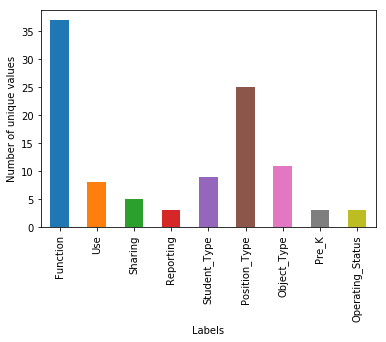

In [11]:
# Calculate number of unique values for each label: num_unique_labels
num_unique_labels = df[LABELS].apply(pd.Series.nunique)

# Plot number of unique values for each label
num_unique_labels.plot(kind='bar')

# Label the axes
plt.xlabel('Labels')
plt.ylabel('Number of unique values')

# Display the plot
plt.show();

## Computing log loss with NumPy

To see how the **log loss metric** handles the trade-off between accuracy and confidence, we will use some sample data generated with NumPy and compute the log loss using the provided function `compute_log_loss()`.

5 one-dimensional numeric arrays simulating different types of predictions have been pre-loaded: actual_labels, correct_confident, correct_not_confident, wrong_not_confident, and wrong_confident.

Your job is to compute the log loss for each sample set provided using the `compute_log_loss(predicted_values, actual_values)`. It takes the predicted values as the first argument and the actual values as the second argument.

In [12]:
actual_labels = [1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
correct_confident = [0.95, 0.95, 0.95, 0.95, 0.95, 0.05, 0.05, 0.05, 0.05, 0.05]
correct_not_confident = [0.65, 0.65, 0.65, 0.65, 0.65, 0.35, 0.35, 0.35, 0.35, 0.35]
wrong_not_confident = [0.35, 0.35, 0.35, 0.35, 0.35, 0.65, 0.65, 0.65, 0.65, 0.65]
wrong_confident = [0.05, 0.05, 0.05, 0.05, 0.05, 0.95, 0.95, 0.95, 0.95, 0.95]

In [26]:
import numpy as np

def compute_log_loss(predicted, actual, eps=1e-14):
    """ Computes the logarithmic loss between predicted and
         actual when these are 1D arrays.

         :param predicted: The predicted probabilities as floats between 0-1
         :param actual: The actual binary labels. Either 0 or 1.
         :param eps (optional): log(0) is inf, so we need to offset our
         predicted values slightly by eps from 0 or 1.
     """
    predicted = np.clip(predicted, eps, 1 - eps)
    loss = -1 * np.mean(actual * np.log(predicted)
                        + (1 - actual) 
                        * np.log(1 - predicted))
    return loss

In [28]:
# Compute and print log loss for 1st case
correct_confident_loss = compute_log_loss(correct_confident, actual_labels)
print("Log loss, correct and confident: {}".format(correct_confident_loss)) 

# Compute log loss for 2nd case
correct_not_confident_loss = compute_log_loss(correct_not_confident, actual_labels)
print("Log loss, correct and not confident: {}".format(correct_not_confident_loss)) 

# Compute and print log loss for 3rd case
wrong_not_confident_loss = compute_log_loss(wrong_not_confident, actual_labels)
print("Log loss, wrong and not confident: {}".format(wrong_not_confident_loss)) 

# Compute and print log loss for 4th case
wrong_confident_loss = compute_log_loss(wrong_confident, actual_labels)
print("Log loss, wrong and confident: {}".format(wrong_confident_loss)) 

# Compute and print log loss for actual labels
actual_labels_loss = compute_log_loss(actual_labels, actual_labels)
print("Log loss, actual labels: {}".format(actual_labels_loss)) 

Log loss, correct and confident: 0.026677430412431348
Log loss, correct and not confident: 0.32548727220550666
Log loss, wrong and not confident: 32.236990899179226
Log loss, wrong and confident: 32.236990899179226
Log loss, actual labels: 1.4028870802592218e-10


**Log loss** penalizes highly confident wrong answers much more than any other type. This will be a good metric to use on your models.

## Setting up a train-test split in scikit-learn

Alright, you've been patient and awesome. It's finally time to start training models!

The first step is to `split the data into a training set and a test set`. Some labels don't occur very often, but we want to make sure that they appear in both the training and the test sets. We provide a function that will make sure at least `min_count` examples of each label appear in each split: `multilabel_train_test_split`.

You'll start with a simple model that uses just the numeric columns of your DataFrame when calling `multilabel_train_test_split`. The data has been read into a DataFrame df and a list consisting of just the numeric columns is available as `NUMERIC_COLUMNS`.

In [29]:
# From: https://github.com/drivendataorg/box-plots-sklearn/blob/master/src/data/multilabel.py
# See also: https://github.com/drivendataorg/box-plots-sklearn/blob/master/notebooks/1.0-full-model.ipynb

from warnings import warn

import numpy as np
import pandas as pd

def multilabel_sample(y, size=1000, min_count=5, seed=None):
    """ Takes a matrix of binary labels `y` and returns
        the indices for a sample of size `size` if
        `size` > 1 or `size` * len(y) if size =< 1.
        The sample is guaranteed to have > `min_count` of
        each label.
    """
    try:
        if (np.unique(y).astype(int) != np.array([0, 1])).any():
            raise ValueError()
    except (TypeError, ValueError):
        raise ValueError('multilabel_sample only works with binary indicator matrices')

    if (y.sum(axis=0) < min_count).any():
        raise ValueError('Some classes do not have enough examples. Change min_count if necessary.')

    if size <= 1:
        size = np.floor(y.shape[0] * size)

    if y.shape[1] * min_count > size:
        msg = "Size less than number of columns * min_count, returning {} items instead of {}."
        warn(msg.format(y.shape[1] * min_count, size))
        size = y.shape[1] * min_count

    rng = np.random.RandomState(seed if seed is not None else np.random.randint(1))

    if isinstance(y, pd.DataFrame):
        choices = y.index
        y = y.values
    else:
        choices = np.arange(y.shape[0])

    sample_idxs = np.array([], dtype=choices.dtype)

    # first, guarantee > min_count of each label
    for j in range(y.shape[1]):
        label_choices = choices[y[:, j] == 1]
        label_idxs_sampled = rng.choice(label_choices, size=min_count, replace=False)
        sample_idxs = np.concatenate([label_idxs_sampled, sample_idxs])

    sample_idxs = np.unique(sample_idxs)

    # now that we have at least min_count of each, we can just random sample
    sample_count = int(size - sample_idxs.shape[0])

    # get sample_count indices from remaining choices
    remaining_choices = np.setdiff1d(choices, sample_idxs)
    remaining_sampled = rng.choice(remaining_choices,
                                   size=sample_count,
                                   replace=False)

    return np.concatenate([sample_idxs, remaining_sampled])


def multilabel_sample_dataframe(df, labels, size, min_count=5, seed=None):
    """ Takes a dataframe `df` and returns a sample of size `size` where all
        classes in the binary matrix `labels` are represented at
        least `min_count` times.
    """
    idxs = multilabel_sample(labels, size=size, min_count=min_count, seed=seed)
    return df.loc[idxs]


def multilabel_train_test_split(X, Y, size, min_count=5, seed=None):
    """ Takes a features matrix `X` and a label matrix `Y` and
        returns (X_train, X_test, Y_train, Y_test) where all
        classes in Y are represented at least `min_count` times.
    """
    index = Y.index if isinstance(Y, pd.DataFrame) else np.arange(Y.shape[0])

    test_set_idxs = multilabel_sample(Y, size=size, min_count=min_count, seed=seed)
    train_set_idxs = np.setdiff1d(index, test_set_idxs)

    test_set_mask = index.isin(test_set_idxs)
    train_set_mask = ~test_set_mask

    return (X[train_set_mask], X[test_set_mask], Y[train_set_mask], Y[test_set_mask])

In [30]:
NUMERIC_COLUMNS = ['FTE', 'Total']